In [79]:
import sys
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./util/')
from util.NeuroDataResource import NeuroDataResource
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import nibabel as nib
from tifffile import imsave, imread
from PIL import Image
from intern.resource.boss.resource import ChannelResource
import SimpleITK as sitk
import itertools
import cv2
init_notebook_mode(connected=True)

COLLECTION = 'ailey-dev'
EXPERIMENT = "s3617"
CHANNEL = "channel0"
x_range = [7000, 7400]
y_range = [6200, 6800]
z_range = [650, 700]
resolution = 0
API_TOKEN = "4d80a72b2b7ce1f41bda63e6151ab87f0c96d928"
HOST = 'api.boss.neurodata.io'
CHANNEL = 'channel0'

In [7]:
print(ChannelResource._valid_datatypes)

['uint8', 'uint16', 'uint64']


In [80]:
myResource = NeuroDataResource(HOST,
                               API_TOKEN,
                               COLLECTION,
                               EXPERIMENT,
                               [{'name': CHANNEL, 'dtype':'uint16'}])

# Validating brain image

In [81]:
cutout = myResource.get_cutout('channel0', z_range, y_range, x_range)
print('(z, y, x):')
print(cutout.shape)

(z, y, x):
(50, 600, 400)


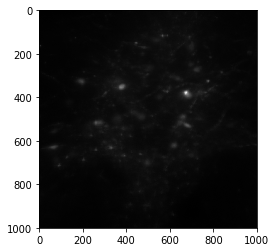

In [8]:
# Getting a slice of the volume at z = 50 of the volume.
cutout_slice = cutout[40,:,:]

plt.imshow(cutout_slice, cmap='gray')
plt.show()

# Saving the image

## Saving to nii format

In [7]:
nifti_img = nib.Nifti1Image(cutout, np.eye(4))
nib.save(nifti_img, 's3617_cutout.nii')

In [73]:
print(cutout.max(axis=1).max(axis=1).max())

65535.0


## Saving to tif format

In [82]:
# cutout = imread('ex_Repo_hb9_eve.tif')
dim = cutout.shape
new_cutout = np.zeros((dim[0], dim[1], dim[2], 3))
max_val = 0
denomin = 65535.0
i = 0
for i in range(dim[0]):
    for j in range(dim[1]):
        for k in range(dim[2]):
            val = int(255*(cutout[i][j][k]/denomin))
            new_cutout[i][j][k][0] = val
            new_cutout[i][j][k][1] = val
            new_cutout[i][j][k][2] = val

In [83]:
imsave('s3617_cutout_small.tif', new_cutout.astype(np.uint8))
# sitk.WriteImage(sitk.Cast(cutout,sitk.sitkUInt16),'my_image_test_a.tif')

## Opening the image

In [67]:
# im = Image.open('ex_Repo_hb9_eve.tif')
# im = imread('s3617_cutout.tif')
im = imread('ex_Repo_hb9_eve.tif')
print(im.shape)
im[0,0,0]

(105, 249, 236, 3)


array([12,  0,  3], dtype=uint8)